# 1.) Import the data from CCLE into a new Google Colab file

In [5]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [6]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [7]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ441B/insurance.csv")

In [8]:
df.loc[df["sex"] == "female","sex"] = 1.
df.loc[df["sex"] == "male","sex"] = 0.
df.loc[df['smoker']=='yes','smoker'] = 1.
df.loc[df['smoker']=='no','smoker'] = 0.
### Do the same for smoker, region

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1.0,27.900,0,1.0,southwest,16884.92400
1,18,0.0,33.770,1,0.0,southeast,1725.55230
2,28,0.0,33.000,3,0.0,southeast,4449.46200
3,33,0.0,22.705,0,0.0,northwest,21984.47061
4,32,0.0,28.880,0,0.0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0.0,30.970,3,0.0,northwest,10600.54830
1334,18,1.0,31.920,0,0.0,northeast,2205.98080
1335,18,1.0,36.850,0,0.0,southeast,1629.83350
1336,21,1.0,25.800,0,0.0,southwest,2007.94500


In [9]:
from sklearn import preprocessing

In [10]:
le = preprocessing.LabelEncoder()

In [11]:
le.fit(df['region'])

LabelEncoder()

In [12]:
list(le.classes_)

['northeast', 'northwest', 'southeast', 'southwest']

In [13]:
df['region']=le.transform(df['region']) 
df

,age,sex,bmi,children,smoker,region,charges
0,19,1.0,27.900,0,1.0,3,16884.92400
1,18,0.0,33.770,1,0.0,2,1725.55230
2,28,0.0,33.000,3,0.0,2,4449.46200
3,33,0.0,22.705,0,0.0,1,21984.47061
4,32,0.0,28.880,0,0.0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,0.0,30.970,3,0.0,1,10600.54830
1334,18,1.0,31.920,0,0.0,0,2205.98080
1335,18,1.0,36.850,0,0.0,2,1629.83350
1336,21,1.0,25.800,0,0.0,3,2007.94500


In [44]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1.0,27.900,0,1.0,3,16884.92400
1,18,0.0,33.770,1,0.0,2,1725.55230
2,28,0.0,33.000,3,0.0,2,4449.46200
3,33,0.0,22.705,0,0.0,1,21984.47061
4,32,0.0,28.880,0,0.0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,0.0,30.970,3,0.0,1,10600.54830
1334,18,1.0,31.920,0,0.0,0,2205.98080
1335,18,1.0,36.850,0,0.0,2,1629.83350
1336,21,1.0,25.800,0,0.0,3,2007.94500


# 2.) Split the data into 80/20, in/out sample

In [14]:
import numpy as np

In [30]:
data = np.array(df.iloc[:, :-1])
target = np.array(df.iloc[:, -1])

In [31]:
cut = int((len(data) * .8) // 1)

In [32]:
in_data = data[:cut]
out_data = data[cut:]

in_target = target[:cut]
out_target = target[cut:]

# 3.) Normalize the Data

In [33]:
from sklearn import preprocessing

In [34]:
scaler = preprocessing.StandardScaler().fit(in_data)
in_data_scale = scaler.transform(in_data)

out_data_scale = scaler.transform(out_data)

# 4.) Get lambda from Lasso cross validation

In [35]:
from sklearn.linear_model import LassoCV

modCV = LassoCV().fit(in_data_scale, in_target)

In [36]:
a=modCV.alpha_

In [37]:
a

133.34880015958146

# 5.) Run a lasso regression with that Lambda

In [38]:
from sklearn import linear_model

In [39]:
mod1 = linear_model.Lasso(alpha=a).fit(in_data_scale, in_target)

In [40]:
mod1.coef_

array([3564.26137833,    0.        , 1890.8527485 ,  398.24050447,
       9324.84227138, -326.52198757])

# 6.) Visualize the coefficients 

In [41]:
import matplotlib.pyplot as plt


In [42]:
mod1.coef_

array([3564.26137833,    0.        , 1890.8527485 ,  398.24050447,
       9324.84227138, -326.52198757])

<BarContainer object of 6 artists>

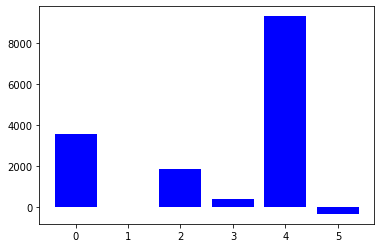

In [43]:
plt.bar(np.arange(0,6), mod1.coef_, width =0.8, bottom = 0, color='b')

# 7.) Interpret the coefficients

In [ ]:
## From the bar graph we can interpret that every variable has positive effect to the amount of insurance charges exept the region and sex
## which have negative effect and no effect respectively . Also the variable 'smoker' has the highest effect to insurance charges.  

# 8.) Compare in and out of sample MSE’s

In [ ]:
#mod1.predict("in sample data")
#mod1.predict("out of sample data")

In [46]:
from sklearn.metrics import mean_squared_error
## in sample

in_sample_pred = mod1.predict(in_data_scale)
print('mean square error of in sample is', mean_squared_error(in_target, in_sample_pred))

out_sample_pred = mod1.predict(out_data_scale)
print('mean square error of out of sample is', mean_squared_error(out_target, out_sample_pred))

mean square error of in sample is 36490415.101693384
mean square error of out of sample is 37252730.724018715
